# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [6]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
pedDf.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
0,10243,18,334,22208,590,44.33243,-39.89323,339.50256,0.0,0.0,1.09188,-0.22728,0.41405,0.51193,18334,31,6.0,7.196578,3.948259
1,10244,18,334,22218,600,44.79450,-39.93472,344.85402,0.0,0.0,1.30857,-0.07286,0.48330,0.15503,18334,31,6.0,6.986529,3.534605
2,10245,18,334,22228,610,45.37294,-39.95876,348.28785,0.0,0.0,1.49758,-0.08617,0.21311,-0.15383,18334,31,6.0,6.749486,3.006418
3,10246,18,334,22238,620,45.98816,-40.01418,349.78826,0.0,0.0,1.49364,-0.21155,-0.05197,-0.24933,18334,31,6.0,6.469653,2.455728
4,10247,18,334,22248,630,46.56268,-40.12827,349.67809,0.0,0.0,1.44663,-0.30667,-0.03688,-0.11380,18334,31,6.0,6.150449,1.964608


In [7]:
from extractors.LocationData import LocationData
scene10 = LocationData.load("../data/location-2", "2022-11-19-fps-2.5-scene-21.dll")

2022-11-22 13:44:42.614 | INFO     | extractors.LocationData:load:449 - reading from ../data/location-2\2022-11-19-fps-2.5-scene-21.dll


2022-11-22 11:53:39.427 | INFO     | tools.TrajectoryVisualizer:initPlot:31 - Loading background image from E:/Datasets/inD-dataset-v1.0/data/18_background.png


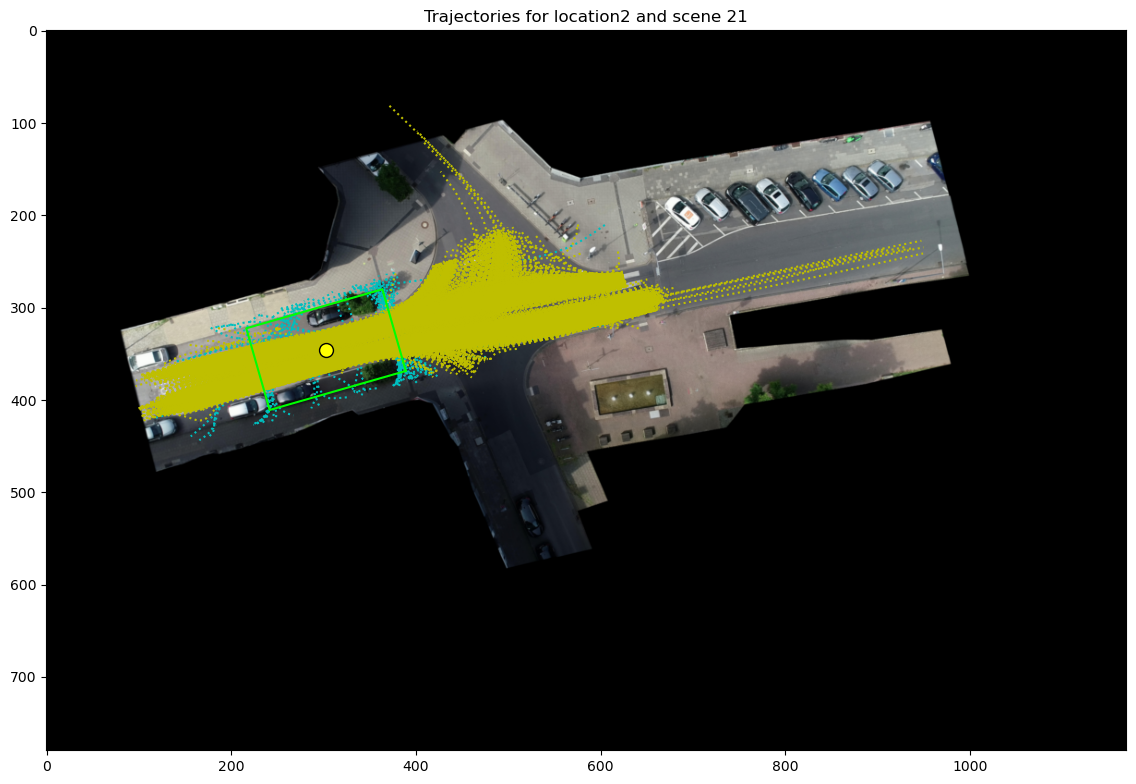

In [9]:
visualizer.showLocationSceneData(scene10, onlyClipped=True, showOthers=True)

In [8]:
pedDf.describe()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.0,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.0,589.000000,589.000000
mean,64590.563667,22.726655,153.984720,8231.398981,446.519525,47.129536,-42.256447,186.083229,0.0,0.0,0.124719,0.110567,0.000391,0.012322,22880.640068,31.0,6.0,3.963909,2.228245
std,37205.884038,2.845510,122.248178,7283.061793,315.117851,8.411600,4.693036,113.278396,0.0,0.0,1.071713,0.671698,0.220005,0.220858,2863.696658,0.0,0.0,7.073284,6.538215
min,10243.000000,18.000000,16.000000,0.000000,0.000000,10.943360,-52.515910,0.620800,0.0,0.0,-1.863760,-1.552930,-1.068600,-0.845820,18334.000000,31.0,6.0,-6.498478,-4.414461
25%,41027.000000,21.000000,19.000000,1320.000000,170.000000,46.451410,-45.604490,84.677450,0.0,0.0,-0.946160,-0.313240,-0.088490,-0.113800,21328.000000,31.0,6.0,-0.373659,-1.821319
50%,55357.000000,22.000000,129.000000,5810.000000,400.000000,49.414390,-42.669550,164.813780,0.0,0.0,0.223810,0.141240,0.004970,0.003490,22101.000000,31.0,6.0,2.735580,0.868254
75%,78101.000000,24.000000,232.000000,11344.000000,700.000000,51.785410,-40.115790,324.890330,0.0,0.0,1.122030,0.655740,0.098560,0.137290,24171.000000,31.0,6.0,5.200494,3.346067
max,150479.000000,29.000000,431.000000,22466.000000,1210.000000,56.772840,-30.055860,359.985320,0.0,0.0,2.177240,1.451590,0.954000,0.929990,29431.000000,31.0,6.0,27.182317,31.916845


In [39]:
pedDf["uniqueTrackId"].unique()

array([18334, 19019, 19093, 19232, 19302, 21112, 21328, 21359, 22016,
       22101, 23077, 23205, 23391, 24128, 24129, 24171, 24241, 25032,
       26169, 29173, 29174, 29209, 29431], dtype=int64)

In [1]:
import seaborn as sns

In [18]:
otherDf.head(1).iloc[0]["sceneY"]

-1.3620239602302675

In [40]:
aPed = pedDf[pedDf["uniqueTrackId"]==19019]

In [44]:
xSeries = aPed["sceneX"].rolling(window=2).sum()
xSeries.iloc[0] = xSeries.iloc[1]
xSeries

19     1.832045
20     1.832045
21     2.520842
22     3.172894
23     3.784790
24     4.343271
25     4.844694
26     5.268187
27     5.609195
28     5.884662
29     6.169001
30     6.532382
31     6.962512
32     7.425325
33     7.894427
34     8.343090
35     8.762990
36     9.156105
37     9.487395
38     9.694434
39     9.790366
40     9.860002
41     9.899792
42     9.853233
43     9.751190
44     9.673844
45     9.667368
46     9.724468
47     9.803723
48     9.834565
49     9.785614
50     9.711064
51     9.714332
52     9.892049
53    10.325229
54    10.920268
55    11.279092
56    11.292594
Name: sceneX, dtype: float64

In [45]:
aPed["sceneX"]

19    0.736984
20    1.095061
21    1.425781
22    1.747113
23    2.037677
24    2.305595
25    2.539099
26    2.729088
27    2.880107
28    3.004555
29    3.164446
30    3.367936
31    3.594576
32    3.830749
33    4.063677
34    4.279413
35    4.483577
36    4.672528
37    4.814867
38    4.879567
39    4.910799
40    4.949202
41    4.950590
42    4.902643
43    4.848547
44    4.825297
45    4.842071
46    4.882397
47    4.921326
48    4.913239
49    4.872375
50    4.838688
51    4.875643
52    5.016406
53    5.308823
54    5.611445
55    5.667647
56    5.624948
Name: sceneX, dtype: float64

In [50]:
def velocity(x):
    # print(x)
    return (x.iloc[0]-x.iloc[1]) / (1/2.5)
    # return (x.iloc[0]-x.iloc[1]) 
xSeries = aPed["sceneY"].rolling(window=2).apply(velocity)
xSeries.iloc[0] = xSeries.iloc[1]
xSeries

19    0.777045
20    0.777045
21    0.874711
22    0.916725
23    0.892140
24    0.872254
25    0.862791
26    0.883648
27    0.870279
28    0.773856
29    0.792775
30    0.855652
31    0.779710
32    0.749929
33    0.738905
34    0.701422
35    0.735196
36    0.761429
37    0.876007
38    0.862411
39    0.682633
40    0.528419
41    0.372314
42    0.214372
43    0.097596
44    0.012787
45   -0.023541
46    0.004952
47    0.097062
48    0.152678
49    0.101990
50   -0.018725
51   -0.078758
52    0.030806
53    0.217239
54    0.464636
55    0.708126
56    0.837595
Name: sceneY, dtype: float64

In [66]:
def getVelocitySeries(aPedDf: pd.DataFrame, onCol, fps):
    seriesVelo = aPedDf[onCol].rolling(window=2).apply(lambda values: (values.iloc[0]-values.iloc[1]) / (1/fps))
    seriesVelo.iloc[0] = seriesVelo.iloc[1]
    return seriesVelo

getVelocitySeries(aPed, "sceneY", 2.5)
    

573   -1.059015
574   -1.059015
575   -1.310507
576   -1.563554
577   -1.697222
578   -1.683800
579   -1.583569
580   -1.469351
581   -1.440451
582   -1.328433
583   -1.275610
584   -1.234890
585   -1.120818
586   -0.982736
587   -1.023128
588   -1.036970
Name: sceneY, dtype: float64

In [69]:
pedVelocities = []
for pedId in pedDf["uniqueTrackId"].unique():
    aPed = pedDf[pedDf["uniqueTrackId"]==pedId] 
    pedVelocities.append(getVelocitySeries(aPed, "sceneY", 2.5))

velSeries = pd.concat(pedVelocities)

In [62]:
velSeries

0      1.034135
1      1.034135
2      1.320468
3      1.376727
4      1.227800
         ...   
584   -1.234890
585   -1.120818
586   -0.982736
587   -1.023128
588   -1.036970
Name: sceneY, Length: 589, dtype: float64

In [63]:
assert len(pedDf) == len(velSeries)

In [64]:
pedDf["sceneYSpeed"] = velSeries

In [65]:
pedDf[pedDf["uniqueTrackId"]==19019]["sceneYSpeed"]

19    0.777045
20    0.777045
21    0.874711
22    0.916725
23    0.892140
24    0.872254
25    0.862791
26    0.883648
27    0.870279
28    0.773856
29    0.792775
30    0.855652
31    0.779710
32    0.749929
33    0.738905
34    0.701422
35    0.735196
36    0.761429
37    0.876007
38    0.862411
39    0.682633
40    0.528419
41    0.372314
42    0.214372
43    0.097596
44    0.012787
45   -0.023541
46    0.004952
47    0.097062
48    0.152678
49    0.101990
50   -0.018725
51   -0.078758
52    0.030806
53    0.217239
54    0.464636
55    0.708126
56    0.837595
Name: sceneYSpeed, dtype: float64